In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import *
import colorlover as cl

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
data = pd.read_excel('./财政收入.xlsx', sheet_name='Sheet2', index_col=0)
data.head(10)

,x1,x2,x3,x4,x5,x6,x7,y
date,,,,,,,,
2010,5198.20,518.80,2040.77,3306.05,1601.31,2526.10,3005.380000,1075.25
2011,6230.20,635.00,2436.78,4010.03,2000.22,3000.59,3609.170000,1298.77
2012,7306.54,733.02,2807.35,4683.45,2400.93,3474.30,3441.195735,1427.25
2013,8199.49,831.31,3062.56,5265.55,2509.40,4124.39,3375.360000,1591.59
2014,8956.05,903.49,3192.01,5460.03,2152.36,4583.36,3550.330000,1771.85
2015,10006.29,1020.03,3441.54,5484.47,2071.66,5069.67,3456.390000,2008.96
2016,10820.75,1142.60,3627.76,5533.56,1761.65,5627.29,3486.220000,2198.54
2017,11886.57,1271.91,3837.39,4212.66,684.94,6228.81,3981.010000,2439.23
2018,13009.17,1470.02,4004.14,4718.05,745.90,6778.60,4502.830000,2783.84


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2010 to 2019
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   y       10 non-null     float64
dtypes: float64(8)
memory usage: 720.0 bytes


In [6]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9564.341000,1010.621000,3266.607000,4775.662000,1673.003000,4854.943000,3727.835574,1961.858000
std,2915.230349,353.509989,697.702395,741.936545,693.881548,1592.030508,565.324007,647.490979
min,5198.200000,518.800000,2040.770000,3306.050000,684.940000,2526.100000,3005.380000,1075.250000
25%,7529.777500,757.592500,2871.152500,4330.357500,1001.572500,3636.822500,3444.994301,1468.335000
50%,9481.170000,961.760000,3316.775000,4900.410000,1880.935000,4826.515000,3518.275000,1890.405000
75%,11620.115000,1239.582500,3784.982500,5411.410000,2132.185000,6078.430000,3888.050000,2379.057500
max,14030.150000,1580.030000,4215.770000,5533.560000,2509.400000,7136.320000,4870.470000,3023.300000


<AxesSubplot:xlabel='date'>

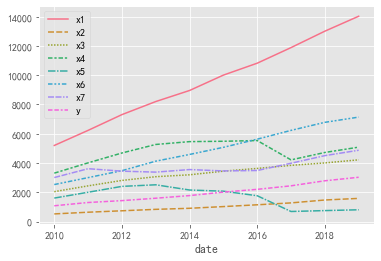

In [7]:
index = data.index
df = pd.DataFrame(data, index)
sns.lineplot(data=df)

In [8]:
pearson = np.round(data.corr(method='pearson'), 2)
pearson

,x1,x2,x3,x4,x5,x6,x7,y
x1,1.00,1.00,0.99,0.47,-0.71,1.00,0.86,1.00
x2,1.00,1.00,0.98,0.42,-0.75,0.99,0.89,1.00
x3,0.99,0.98,1.00,0.57,-0.62,0.99,0.81,0.97
x4,0.47,0.42,0.57,1.00,0.26,0.47,0.18,0.41
x5,-0.71,-0.75,-0.62,0.26,1.00,-0.72,-0.76,-0.76
x6,1.00,0.99,0.99,0.47,-0.72,1.00,0.84,0.99
x7,0.86,0.89,0.81,0.18,-0.76,0.84,1.00,0.89
y,1.00,1.00,0.97,0.41,-0.76,0.99,0.89,1.00


In [9]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

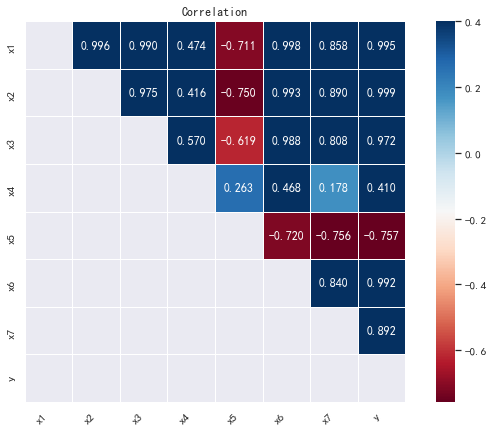

In [10]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(11,7)})
    ax = sns.heatmap(corr,
                    xticklabels=True, yticklabels=True,
                    cmap='RdBu', # cmap='Y1GnBu' # 颜色
                    mask=mask, # 使用掩码只绘制矩阵的一部分
                    fmt='.3f', # 格式设置
                    annot=True, # 方格内写入数据
                    linewidths=.5, # 热力图矩阵之间的间隔大小
                    vmax=.4, # 图例中最大值
                    square=True)
    
plt.title('Correlation')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')

## 灰度预测

In [11]:
def gm11(x0):
    '''
    #自定义灰色预测函数
    :param x0:
    :return:
    '''
    x1 = x0.cumsum()                    # 1-AGO序列
    z1 = (x1[:len(x1)-1] + x1[1:])/2.0  # 紧邻均值（MEAN）生成序列
    z1 = z1.reshape((len(z1), 1))
    B = np.append(-z1, np.ones_like(z1), axis=1)
    Yn = x0[1:].reshape((len(x0)-1, 1))
    [[a], [b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn)        # 计算参数
    f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2))    # 还原值
    delta = np.abs(x0 - np.array([f(i) for i in range(1, len(x0)+1)]))
    C = delta.std()/x0.std()
    P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
    return f, a, b, x0[0], C, P

In [12]:
new_reg_data = pd.read_excel('./财政收入.xlsx', sheet_name='Sheet3')   # 读取经过特征选择后的数据
new_reg_data.index = range(2010, 2020)
new_reg_data.loc[2020] = None
new_reg_data.loc[2021] = None
col = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
for i in col:

    f = gm11(new_reg_data.loc[range(2010, 2020), i].values)[0]
    new_reg_data.loc[2020, i] = f(len(new_reg_data)-1)    # 2014年预测结果 len()：列长
    new_reg_data.loc[2021, i] = f(len(new_reg_data))      # 2015年预测结果
    new_reg_data[i] = new_reg_data[i].round(2)    

outputFile = 'new_reg_data_GM11.xls'            # 灰色预测后保存的路径
y = list(data['y'].values)                      # 提取财政收入列，合并至新数据框中
y.extend([np.nan, np.nan])   # y列新增两行 NaN
new_reg_data['y'] = y
new_reg_data.to_excel(outputFile)                        # 结果输出
print(new_reg_data)
print('预测结果为：', new_reg_data.loc[2020: 2021, :])   # 预测结果展示


            x1       x2       x3       x4       x5       x6       x7        y
2010   5198.20   518.80  2040.77  3306.05  1601.31  2526.10  3005.38  1075.25
2011   6230.20   635.00  2436.78  4010.03  2000.22  3000.59  3609.17  1298.77
2012   7306.54   733.02  2807.35  4683.45  2400.93  3474.30  3441.20  1427.25
2013   8199.49   831.31  3062.56  5265.55  2509.40  4124.39  3375.36  1591.59
2014   8956.05   903.49  3192.01  5460.03  2152.36  4583.36  3550.33  1771.85
2015  10006.29  1020.03  3441.54  5484.47  2071.66  5069.67  3456.39  2008.96
2016  10820.75  1142.60  3627.76  5533.56  1761.65  5627.29  3486.22  2198.54
2017  11886.57  1271.91  3837.39  4212.66   684.94  6228.81  3981.01  2439.23
2018  13009.17  1470.02  4004.14  4718.05   745.90  6778.60  4502.83  2783.84
2019  14030.15  1580.03  4215.77  5082.77   801.66  7136.32  4870.47  3023.30
2020  15690.47  1792.04  4566.41  5127.31   894.33  8232.61  4704.62      NaN
2021  17254.32  2005.71  4854.96  5166.00   794.21  9113.75  491

## SVR

In [16]:
from sklearn.svm import LinearSVR

In [17]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示，否则可能无法显示中文或者是各种字符错乱
plt.rcParams['axes.unicode_minus'] = False

In [18]:
inputFile = 'new_reg_data_GM11.xls'
data_svr = pd.read_excel(inputFile, index_col=0)
feature = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
data_svr_train = data_svr.loc[range(2010, 2019)].copy()

data_svr_mean = data_svr_train.mean()
data_svr_std = data_svr_train.std()
data_svr_train = (data_svr_train - data_svr_mean) / data_svr_std # 数据标准化

In [20]:
data_svr_train

,x1,x2,x3,x4,x5,x6,x7,y
2010,-1.485041,-1.386338,-1.723631,-1.843738,-0.255139,-1.422509,-1.410651,-1.369203
2011,-1.089024,-1.010440,-1.114393,-0.939548,0.348850,-1.097280,0.019646,-0.971055
2012,-0.675992,-0.693352,-0.544292,-0.074609,0.955565,-0.772585,-0.378252,-0.742198
2013,-0.333334,-0.375391,-0.151666,0.673039,1.119799,-0.326995,-0.534219,-0.449466
2014,-0.043013,-0.141895,0.047485,0.922828,0.579205,-0.012404,-0.119738,-0.128376
2015,0.360003,0.235104,0.431372,0.954219,0.457017,0.320927,-0.342269,0.293979
2016,0.672542,0.631608,0.717861,1.017270,-0.012369,0.703136,-0.271606,0.631671
2017,1.081537,1.049916,1.040365,-0.679291,-1.642614,1.115435,0.900485,1.060403
2018,1.512321,1.690787,1.296900,-0.030169,-1.550315,1.492276,2.136606,1.674244


In [25]:
x_train = data_svr_train[feature].values # 特征数据
y_train = data_svr_train['y'].values # 标签数据
svr = LinearSVR(max_iter=10000)
svr.fit(x_train, y_train)

x = ((data_svr[feature] - data_svr_mean[feature]) / data_svr_std[feature]).values # 预测，并还原数据
data_svr[u'y_pred'] = svr.predict(x) * data_svr_std['y'] + data_svr_mean['y']

In [26]:
data_svr

,x1,x2,x3,x4,x5,x6,x7,y,y_pred
2010,5198.20,518.80,2040.77,3306.05,1601.31,2526.10,3005.38,1075.25,1075.250000
2011,6230.20,635.00,2436.78,4010.03,2000.22,3000.59,3609.17,1298.77,1298.825154
2012,7306.54,733.02,2807.35,4683.45,2400.93,3474.30,3441.20,1427.25,1427.244308
2013,8199.49,831.31,3062.56,5265.55,2509.40,4124.39,3375.36,1591.59,1609.425924
2014,8956.05,903.49,3192.01,5460.03,2152.36,4583.36,3550.33,1771.85,1821.642295
2015,10006.29,1020.03,3441.54,5484.47,2071.66,5069.67,3456.39,2008.96,1983.633372
2016,10820.75,1142.60,3627.76,5533.56,1761.65,5627.29,3486.22,2198.54,2198.538959
2017,11886.57,1271.91,3837.39,4212.66,684.94,6228.81,3981.01,2439.23,2460.140178
2018,13009.17,1470.02,4004.14,4718.05,745.90,6778.60,4502.83,2783.84,2783.788952
2019,14030.15,1580.03,4215.77,5082.77,801.66,7136.32,4870.47,3023.30,2997.349729


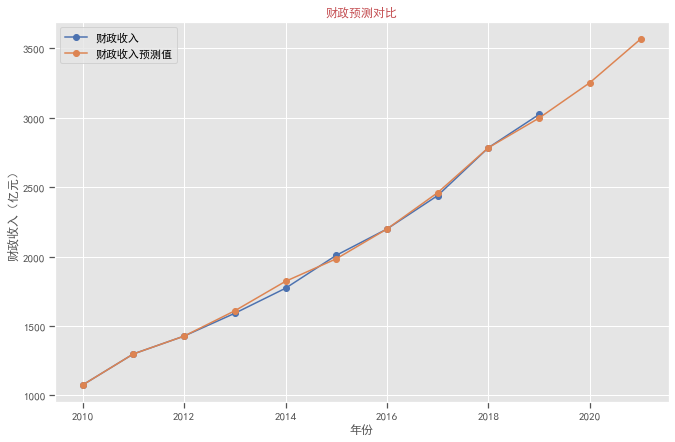

In [27]:
outputFile = 'new_reg_data_GM11_revenue.xls'
data_svr.to_excel(outputFile)
plt.title('财政预测对比', color='r')
plt.xlabel('年份')
plt.ylabel('财政收入（亿元）')
plt.plot(data_svr[['y', 'y_pred']], marker='o') # 画图对比
plt.legend(['财政收入', '财政收入预测值'])
plt.savefig('1.png')

In [28]:
from sklearn.metrics import mean_squared_error        # 均方根误差
from sklearn.metrics import mean_absolute_error       # 平均绝对误差
from sklearn.metrics import r2_score                  # 校正决定系数R方值
from sklearn.metrics import mean_squared_log_error    # 均方根对数误差
from sklearn.metrics import median_absolute_error     # 中位数绝对误差
from sklearn.metrics import explained_variance_score  # 解释回归模型的方差得分

In [29]:
y_test = data_svr.loc[:2019, ['y']]
y_predict = data_svr.loc[:2019, ['y_pred']]

In [30]:
data_svr.loc[:2019, ['y']]

,y
2010,1075.25
2011,1298.77
2012,1427.25
2013,1591.59
2014,1771.85
2015,2008.96
2016,2198.54
2017,2439.23
2018,2783.84
2019,3023.30


In [31]:
print('平均绝对误差:', mean_absolute_error(y_test, y_predict))
print('均方根误差:', mean_squared_error(y_test, y_predict))
print('校正决定系数:', r2_score(y_test, y_predict))
print('均方根对数误差:', mean_squared_log_error(y_test, y_predict))
print('中位数绝对误差:', median_absolute_error(y_test, y_predict))
print('解释回归模型的方差得分:', explained_variance_score(y_test, y_predict))

平均绝对误差: 13.992823127028737
均方根误差: 454.94887018048456
校正决定系数: 0.9987942628630412
均方根对数误差: 0.00011991259735058554
中位数绝对误差: 8.945538837714935
解释回归模型的方差得分: 0.9988310545245437


## BP神经网络

In [32]:
outputFile = './new_reg_data_GM11_bp_revenue.xls'
modelfile = './1-net.model'

inputFile = 'new_reg_data_GM11.xls'
data_bp = pd.read_excel(inputFile, index_col=0)
feature = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
data_bp_train = data_bp.loc[range(2010, 2019)].copy()

data_bp_mean = data_bp_train.mean()
data_bp_std = data_bp_train.std()
data_bp_train = (data_bp_train - data_bp_mean) / data_bp_std # 数据标准化

x_bp_train = data_bp_train[feature].values # 特征数据
y_bp_train = data_bp_train['y'].values # 标签数据


In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential() #建立模型
model.add(Dense(9, input_dim=7))
model.add(Activation('relu'))
# model.add(Dense(12, init='uniform', activation='relu'))
# model.add(Dense(12, init='uniform', activation='relu'))
# model.add(Dense(6, init='uniform', activation='relu'))
# model.add(Dense(7, input_dim=6))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam') #编译模型
model.fit(x_bp_train, y_bp_train, epochs = 1000, batch_size = 16) #训练模型，学习一千次
# model.save_weights(modelfile) #保存模型参数

x = ((data_bp[feature] - data_bp_mean[feature])/data_bp_std[feature]).values
data_bp[u'y_pred'] = model.predict(x) * data_bp_std['y'] + data_bp_mean['y']
data_bp.to_excel(outputFile)

Epoch 1/1000
1/1 [==============================] - 0s 360ms/step - loss: 3.0004
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9567
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9134
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8692
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.8255
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7822
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7398
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.6985
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.6577
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.6173
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5775
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.5381
Epoch 13/1000
1/1 [============================

1/1 [==============================] - 0s 5ms/step - loss: 0.6134
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6032
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5931
Epoch 106/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5834
Epoch 107/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5738
Epoch 108/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5643
Epoch 109/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5549
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5457
Epoch 111/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5365
Epoch 112/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5275
Epoch 113/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5186
Epoch 114/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5099
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 205/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0974
Epoch 206/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0956
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0939
Epoch 208/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 209/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0904
Epoch 210/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 211/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 212/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 213/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 214/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0823
Epoch 215/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0808
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 308/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 309/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 310/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 311/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 314/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 315/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 316/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 409/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 410/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 411/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 412/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 413/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 414/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 416/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 417/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 508/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 509/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 510/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 511/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 512/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 513/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 514/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 516/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 517/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 518/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 610/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0018
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 612/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 613/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 614/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 615/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 616/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 618/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 619/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 620/1000
1/1 [========================

1/1 [==============================] - 0s 3ms/step - loss: 8.4093e-04
Epoch 709/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.3426e-04
Epoch 710/1000
1/1 [==============================] - 0s 4ms/step - loss: 8.2758e-04
Epoch 711/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.2099e-04
Epoch 712/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.1449e-04
Epoch 713/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.0797e-04
Epoch 714/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.0148e-04
Epoch 715/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.9508e-04
Epoch 716/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.8880e-04
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.8246e-04
Epoch 718/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.7624e-04
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.7008

1/1 [==============================] - 0s 2ms/step - loss: 3.8428e-04
Epoch 805/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.8101e-04
Epoch 806/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7787e-04
Epoch 807/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7473e-04
Epoch 808/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7158e-04
Epoch 809/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.6844e-04
Epoch 810/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.6529e-04
Epoch 811/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.6218e-04
Epoch 812/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.5915e-04
Epoch 813/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.5608e-04
Epoch 814/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.5312e-04
Epoch 815/1000
1/1 [==============================] - 0s 937us/step - loss: 3.50

1/1 [==============================] - 0s 3ms/step - loss: 1.6647e-04
Epoch 901/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6496e-04
Epoch 902/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6350e-04
Epoch 903/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.6205e-04
Epoch 904/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6058e-04
Epoch 905/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5911e-04
Epoch 906/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5769e-04
Epoch 907/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5628e-04
Epoch 908/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5486e-04
Epoch 909/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5350e-04
Epoch 910/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5212e-04
Epoch 911/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5073

1/1 [==============================] - 0s 2ms/step - loss: 6.8686e-05
Epoch 997/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.8045e-05
Epoch 998/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.7405e-05
Epoch 999/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.6774e-05
Epoch 1000/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.6149e-05


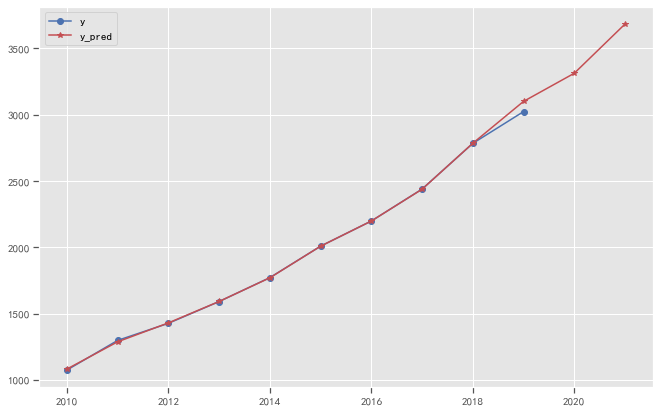

In [34]:
p = data_bp[['y','y_pred']].plot(style=['b-o','r-*'])

In [35]:
y_test = data_bp.loc[:2019, ['y']]
y_predict = data_bp.loc[:2019, ['y_pred']]

In [36]:
print('平均绝对误差:', mean_absolute_error(y_test, y_predict))
print('均方根误差:', mean_squared_error(y_test, y_predict))
print('校正决定系数:', r2_score(y_test, y_predict))
print('均方根对数误差:', mean_squared_log_error(y_test, y_predict))
print('中位数绝对误差:', median_absolute_error(y_test, y_predict))
print('解释回归模型的方差得分:', explained_variance_score(y_test, y_predict))

平均绝对误差: 10.244946777343717
均方根误差: 611.9577919160886
校正决定系数: 0.9983781468988553
均方根对数误差: 7.557057466083051e-05
中位数绝对误差: 1.1024389648437136
解释回归模型的方差得分: 0.9985325193593914
